In [1]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
response=requests.get("http://www.weather.go.kr/weather/observation/currentweather.jsp")

In [3]:
response  # <Response [200]> 성공했다라는 의미  # 404 

<Response [200]>

In [4]:
response.content # 한글도 보고, 보기 좋게 만들고 싶다 ====> beautiful 

b'<!DOCTYPE html>\n\n<html lang="ko">\n\t<head>\n\t\t<meta http-equiv="X-UA-Compatible" content="IE=Edge" />\n\t\t<title>\xb5\xb5\xbd\xc3\xba\xb0 \xc7\xf6\xc0\xe7\xb3\xaf\xbe\xbe &gt; \xc1\xf6\xbb\xf3\xb0\xfc\xc3\xf8\xc0\xda\xb7\xe1 &gt; \xb0\xfc\xc3\xf8\xc0\xda\xb7\xe1 &gt; \xb3\xaf\xbe\xbe &gt; \xb1\xe2\xbb\xf3\xc3\xbb </title>\n\t\t<link rel="shortcut icon" href="http://www.kma.go.kr/iphone-shortcut.png" />\n\t\t<link rel=\'apple-touch-icon-precomposed\' href=\'http://www.kma.go.kr/iphone-shortcut.png\'/> \n\t\t<meta http-equiv="Content-Type" content="text/html; charset=euc-kr" />\n\t\t<link rel="stylesheet" type="text/css" href="/share/css/base.css?ver=20191126" />\n\t\t<link rel="stylesheet" type="text/css" href="/share/css/common.css?ver=20191126" />\n\t\t<link rel="stylesheet" type="text/css" href="/share/css/weather-layout.css?ver=20191126" />\n\t\t<link rel="stylesheet" type="text/css" href="/share/css/component.css?ver=20191126" />\n\t\t<link rel="stylesheet" type="text/css" 

In [5]:
from bs4 import BeautifulSoup

In [6]:
soup=BeautifulSoup(response.content, "html.parser")
soup

<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<title>도시별 현재날씨 &gt; 지상관측자료 &gt; 관측자료 &gt; 날씨 &gt; 기상청 </title>
<link href="http://www.kma.go.kr/iphone-shortcut.png" rel="shortcut icon"/>
<link href="http://www.kma.go.kr/iphone-shortcut.png" rel="apple-touch-icon-precomposed"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="/share/css/base.css?ver=20191126" rel="stylesheet" type="text/css"/>
<link href="/share/css/common.css?ver=20191126" rel="stylesheet" type="text/css"/>
<link href="/share/css/weather-layout.css?ver=20191126" rel="stylesheet" type="text/css"/>
<link href="/share/css/component.css?ver=20191126" rel="stylesheet" type="text/css"/>
<link href="/share/css/add_2018.css?ver=20191126" rel="stylesheet" type="text/css"/>
<link href="/share/css/weather-obs.css?ver=20191126" rel="stylesheet" type="text/css"/>
<script src="/share/js/jquery-1.7.1.min.js"></script>
<script src="/share/js/weather-commo

In [7]:
# 태그 한개만 찾을 때 find 리턴받아 태그이름으로 리턴
table=soup.find('table', {'class' : 'table_develop3'})
#soup.find(태그이름, {속성이름:속성값})
print(f'type(table):{type(table)}')  #type(table)<class 'bs4.element.Tag'> 

type(table)<class 'bs4.element.Tag'>


In [8]:
# table에서 여러개를 tr(줄) 찾을 때
# findall=table.find_all("tr")
# print(type(findall)) # <class 'bs4.element.ResultSet'>
#print(f'table.find_all("tr"){findall}')

data = []

for tr_idx, tr in enumerate(table.find_all("tr")): # index 찾기 쉽도록 enumerate
#     print("="*50)
#     print(f'tr_idx : {tr_idx}, tr:{tr}')
#     print("="*50)
    tds = tr.find_all("td")
#     print(f'len(tds):{len(tds)}')
#     print(f'tds:{tds}\n')
    
    # tds가 없을때가 있고, 에러나므로
    if len(tds) != 0 :
#        for tds_idx, td in enumerate(tds): # index 찾기 쉽도록 enumerate
#             print(f'tds_idx : {tds_idx}  td내용 : {td}')
            
            #상기까지 하면 찾아지나 a 태그 안을 찾고 싶을 때
#             print(f'td.find("a") : {td.find("a")}')
#            if td.find("a") !=None:   #  if td.find("a")와 동일
#                   print(f'td.find("a").text:{td.find("a").text}\n')
#         print()
                        
#         print(f'point:{tds[0].text}')
#         print(f'temperature:{tds[5].text}')
#         print(f'humidity:{tds[10].text}\n')
#         print("@"*50)
        point = tds[0].text
        temperature = tds[5].text
        humidity = tds[10].text

        data.append([point,temperature,humidity])
print(data)
        

[['강릉', '8.5', '37'], ['강진군', '9.7', '39'], ['강화', '5.7', '58'], ['거제', '9.4', '47'], ['거창', '8.5', '26'], ['경주시', '9.4', '22'], ['고산', '11.6', '73'], ['고창', '8.7', '31'], ['고창군', '8.5', '22'], ['고흥', '8.5', '52'], ['광양시', '9.4', '28'], ['광주', '9.6', '9'], ['구미', '7.0', '28'], ['군산', '7.1', '26'], ['금산', '8.0', '22'], ['김해시', '8.4', '30'], ['남원', '8.5', '28'], ['남해', '9.5', '44'], ['대관령', '1.0', '56'], ['대구', '7.3', '24'], ['대전', '7.1', '30'], ['동두천', '4.1', '54'], ['동해', '8.1', '31'], ['목포', '7.8', '26'], ['문경', '4.9', '36'], ['밀양', '8.3', '24'], ['백령도', '9.4', '83'], ['보령', '6.7', '34'], ['보성군', '9.3', '40'], ['보은', '6.9', '19'], ['봉화', '5.7', '25'], ['부산', '9.2', '42'], ['부안', '8.7', '32'], ['부여', '7.1', '23'], ['북강릉', '7.9', '34'], ['북창원', '5.6', '33'], ['북춘천', '3.5', '47'], ['산청', '8.2', '31'], ['상주', '6.9', '26'], ['서귀포', '14.2', '69'], ['서산', '6.8', '31'], ['서울', '5.5', '51'], ['성산', '12.9', '61'], ['속초', '7.6', '45'], ['수원', '5.9', '56'], ['순창군', '8.4', '18'], ['순천', '9.8', '27

In [9]:
with open('weather.csv', 'w') as file:  # 파일있으면 덮어쓰기, 없으면 만들기 # 경로사용하지 않으면 현재폴더
    file.write('point,temperature,humidity\n')   # column 추가    # csv이므로 공백이 없어야 한다. # , \n까지  같이 저장됨
    for i in data:
        file.write('{0},{1},{2}\n'.format(i[0], i[1], i[2]))   # csv이므로 공백이 없어야 한다.  # , \n까지  같이 저장되어야 함

In [10]:
# 인코딩관련 크롬에서 charset를 찾아보면  (utf-8, euc-kr)
df=pd.read_csv('weather.csv', index_col='point', encoding='euc-kr') # index_col 이유 point(지역) 주면 loc통해 찾기가 쉬우므로
df.head()

,temperature,humidity
point,,
강릉,8.5,37
강진군,9.7,39
강화,5.7,58
거제,9.4,47
거창,8.5,26


In [11]:
# 광역시만 모아서 DataFrame 만들기
city_df = df.loc[['서울', '인천', '대전', '대구', '광주', '부산', '울산']] # row 기준으로 loc이용하여 
city_df

,temperature,humidity
point,,
서울,5.5,51
인천,5.3,49
대전,7.1,30
대구,7.3,24
광주,9.6,9
부산,9.2,42
울산,10.1,22


In [12]:
# 한글설정, 윈도우에서 설정해 주면 되는 부분
import matplotlib as mpl
import matplotlib.font_manager as fm
font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name() # 폴더구분자 python / 임
mpl.rc('font', family=font_name) # ahronbd.ttf

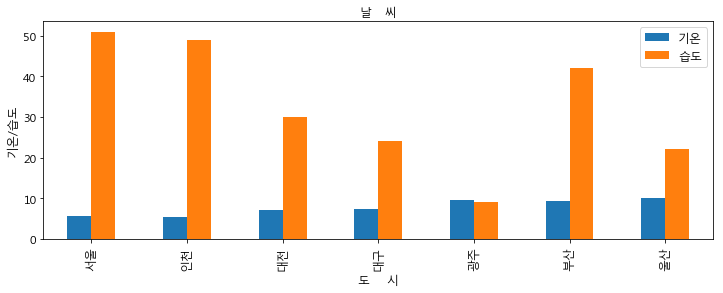

In [13]:
ax=city_df.plot(kind='bar',
                title='날   씨',
                figsize=(12,4),
                legend=True,
                fontsize=12)
ax.set_xlabel('도    시', fontsize=12)
ax.set_ylabel('기온/습도',fontsize=12)
ax.legend(['기온', '습도'], fontsize=12)


In [18]:
#seaborn을 위한 데이터 조정  
city_df.reset_index(inplace=True)
city_df
#city_df.drop()
#city_nd = city_df.values  pd --> nd.array

,point,temperature,humidity
0,서울,5.5,51
1,인천,5.3,49
2,대전,7.1,30
3,대구,7.3,24
4,광주,9.6,9
5,부산,9.2,42
6,울산,10.1,22


In [15]:
#seaborn을 위한 데이터 조정   index_col = False default이용
n_df=pd.read_csv('weather.csv', encoding='euc-kr') # index_col 이유 point(지역) 주면 loc통해 찾기가 쉬우므로
n_df.head()

,point,temperature,humidity
0,강릉,8.5,37
1,강진군,9.7,39
2,강화,5.7,58
3,거제,9.4,47
4,거창,8.5,26


In [16]:
#new_city_df = n_df['point'== ['서울', '인천', '대전', '대구', '광주', '부산', '울산']] # row 기준으로 loc이용하여 
#nn_df=n_df[n_df['point']== ('서울', '인천', '대전', '대구', '광주', '부산', '울산')] # row 기준으로 loc이용하여 
##nn_df=[n_df['point'] in ('서울', '인천', '대전', '대구', '광주', '부산', '울산')] # row 기준으로 loc이용하여 
##nn_df

AttributeError: Unknown property split

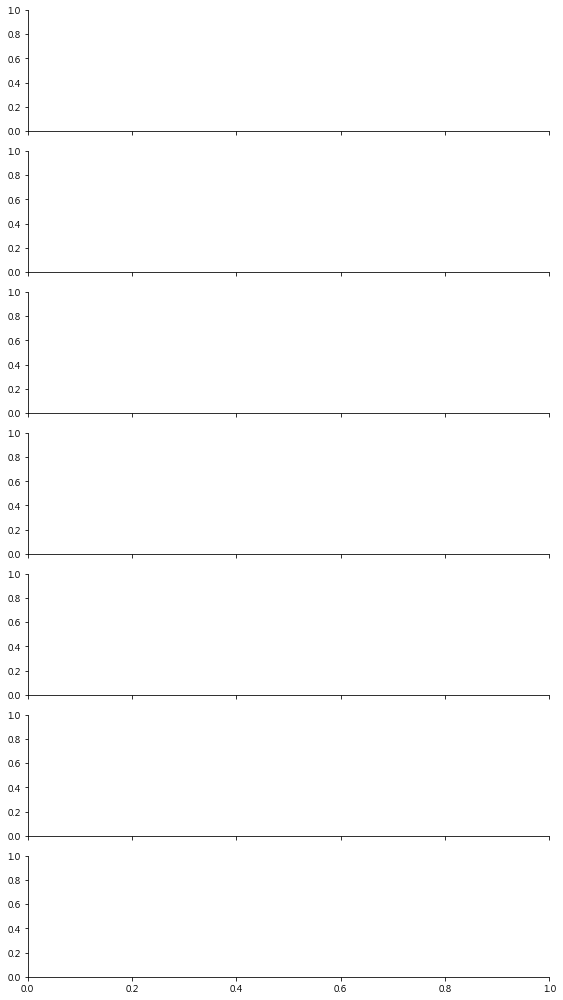

In [26]:
#실패
import seaborn as sns
plt.rcParams['figure.figsize'] = [12, 4] # setting figure size

# 다차원복합데이터
#sns.barplot(x="temperature", y="humidity", hue="point", data=city_df) # hue label 
#sns.barplot(x="temperature", y="humidity", hue="point", data=city_nd)

# 2차원복합데이터
#sns.barplot(x="point", y="humidity", data=city_df) # 2차원 복합 ===> 성공
# data : DataFrame, array, or list of arrays,
# x, y, hue : names of variables in ``data`` or vector data, optional
#     Inputs for plotting long-form data. See examples for interpretation.    

# 1차원데이터
# sns.distplot(city_df, kde=True, rug=True, label=['기온', '습도']) # error # Series, 1d-array, or list.

# catplot  => 실패
# sns.catplot(x="temperature", y="humidity", hue="point", row="humidity", data=city_df,
#             kind="bar", split=False, height=2, aspect=4)

plt.title("특별시 광역시 기온, 습도 Dist Plot")
plt.legend()
plt.show()